<a href="https://colab.research.google.com/github/meenakshikagda/Data-visualization/blob/master/figure_paper_annotations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
url <- "https://www.encodeproject.org/search/?type=Annotation&status=released&field=annotation_type&field=assembly&field=award.rfa&field=lab.title&field=organism.scientific_name&field=targets.investigated_as&field=targets.title&format=json&frame=embedded&limit=all"



In [2]:
library("jsonlite") #https://cran.r-project.org/web/packages/jsonlite/jsonlite.pdf
library("dplyr")
library("httr") #https://cran.r-project.org/web/packages/httr/vignettes/quickstart.html
library("ggplot2")



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
install.packages("splitstackshape")
library(splitstackshape)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
req <- GET(url)

In [5]:
 json <- content(req, as = "text")

No encoding supplied: defaulting to UTF-8.



In [6]:
text <-fromJSON(json)

In [7]:
colnames(text$`@graph`)

[1] "@id"             "@type"           "annotation_type" "assembly"       
[5] "award"           "lab"             "organism"        "targets"

In [8]:
my_df <- flatten(text$`@graph`)

In [9]:
colnames(my_df)


[1] "@id"                      "@type"                   
[3] "annotation_type"          "assembly"                
[5] "targets"                  "award.rfa"               
[7] "lab.title"                "organism.scientific_name"

In [10]:
head(my_df)

,@id,@type,annotation_type,assembly,targets,award.rfa,lab.title,organism.scientific_name
,<chr>,<list>,<chr>,<list>,<list>,<chr>,<chr>,<chr>
1,/annotations/ENCSR684XQE/,"Annotation, FileSet , Dataset , Item",imputation,hg19,"H3K4me3 (Homo sapiens), histone , narrow histone mark",ENCODE4,"Manolis Kellis, Broad",Homo sapiens
2,/annotations/ENCSR827HCB/,"Annotation, FileSet , Dataset , Item",candidate Cis-Regulatory Elements,GRCh38,NULL,ENCODE4,"Zhiping Weng, UMass",Homo sapiens
3,/annotations/ENCSR954MOQ/,"Annotation, FileSet , Dataset , Item",imputation,hg19,"H3K27ac (Homo sapiens), histone , narrow histone mark",ENCODE4,"Manolis Kellis, Broad",Homo sapiens
4,/annotations/ENCSR048DJD/,"Annotation, FileSet , Dataset , Item",imputation,hg19,"H3K4me2 (Homo sapiens), histone , narrow histone mark",ENCODE4,"Manolis Kellis, Broad",Homo sapiens
5,/annotations/ENCSR329FGG/,"Annotation, FileSet , Dataset , Item",imputation,hg19,"H3K79me2 (Homo sapiens), histone , broad histone mark",ENCODE4,"Manolis Kellis, Broad",Homo sapiens
6,/annotations/ENCSR106KYI/,"Annotation, FileSet , Dataset , Item",imputation,hg19,"H3K9me3 (Homo sapiens), histone , broad histone mark",ENCODE4,"Manolis Kellis, Broad",Homo sapiens


In [11]:

colnames(my_df)[6] <- "award"
colnames(my_df)[7] <- "lab"
colnames(my_df)[8] <- "Organism"

In [12]:
colnames(my_df)

[1] "@id"             "@type"           "annotation_type" "assembly"       
[5] "targets"         "award"           "lab"             "Organism"

In [13]:
my_df <- my_df[,-2 ] #remove type

In [14]:
head(my_df)

,@id,annotation_type,assembly,targets,award,lab,Organism
,<chr>,<chr>,<list>,<list>,<chr>,<chr>,<chr>
1,/annotations/ENCSR684XQE/,imputation,hg19,"H3K4me3 (Homo sapiens), histone , narrow histone mark",ENCODE4,"Manolis Kellis, Broad",Homo sapiens
2,/annotations/ENCSR827HCB/,candidate Cis-Regulatory Elements,GRCh38,NULL,ENCODE4,"Zhiping Weng, UMass",Homo sapiens
3,/annotations/ENCSR954MOQ/,imputation,hg19,"H3K27ac (Homo sapiens), histone , narrow histone mark",ENCODE4,"Manolis Kellis, Broad",Homo sapiens
4,/annotations/ENCSR048DJD/,imputation,hg19,"H3K4me2 (Homo sapiens), histone , narrow histone mark",ENCODE4,"Manolis Kellis, Broad",Homo sapiens
5,/annotations/ENCSR329FGG/,imputation,hg19,"H3K79me2 (Homo sapiens), histone , broad histone mark",ENCODE4,"Manolis Kellis, Broad",Homo sapiens
6,/annotations/ENCSR106KYI/,imputation,hg19,"H3K9me3 (Homo sapiens), histone , broad histone mark",ENCODE4,"Manolis Kellis, Broad",Homo sapiens


In [15]:
nrow(my_df)

[1] 439020

In [16]:
ncol(my_df)

[1] 7

In [17]:
my_df2 <- my_df %>% group_by(award) %>% summarise(n = n())

In [18]:
my_df2

award,n
<chr>,<int>
community,374102
ENCODE,39862
ENCODE2,35
ENCODE3,2645
ENCODE4,22278
Roadmap,98


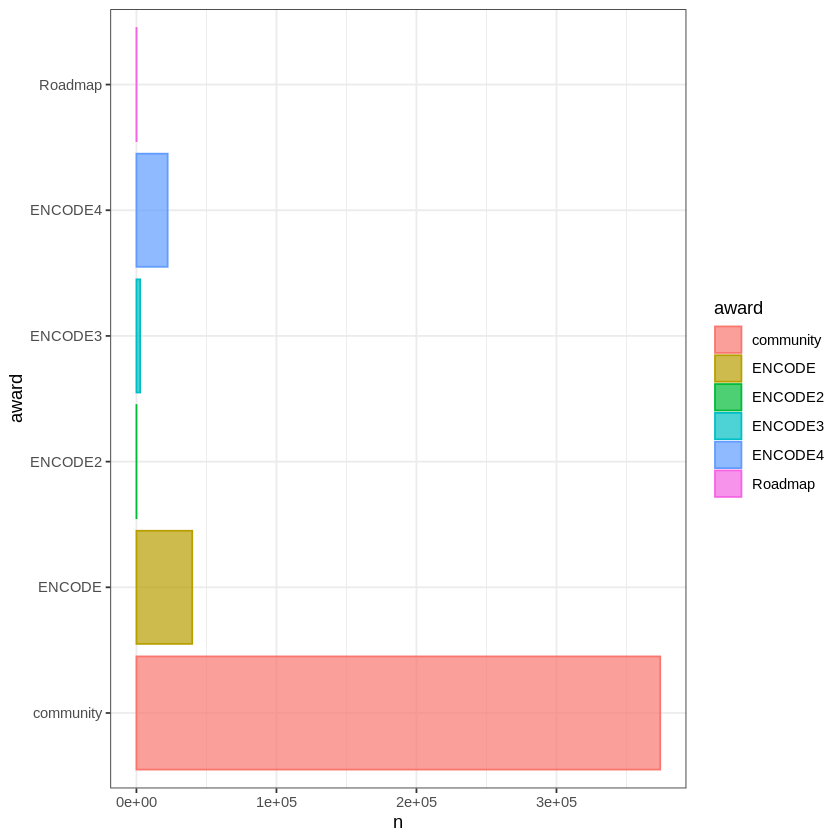

In [31]:
ggplot(my_df2) +
  geom_bar(aes(x=award, 
               y=n, 
               color=award, 
               fill=award), 
           stat="identity", alpha=0.7) + coord_flip() + theme_bw() 

In [51]:
library(RColorBrewer)

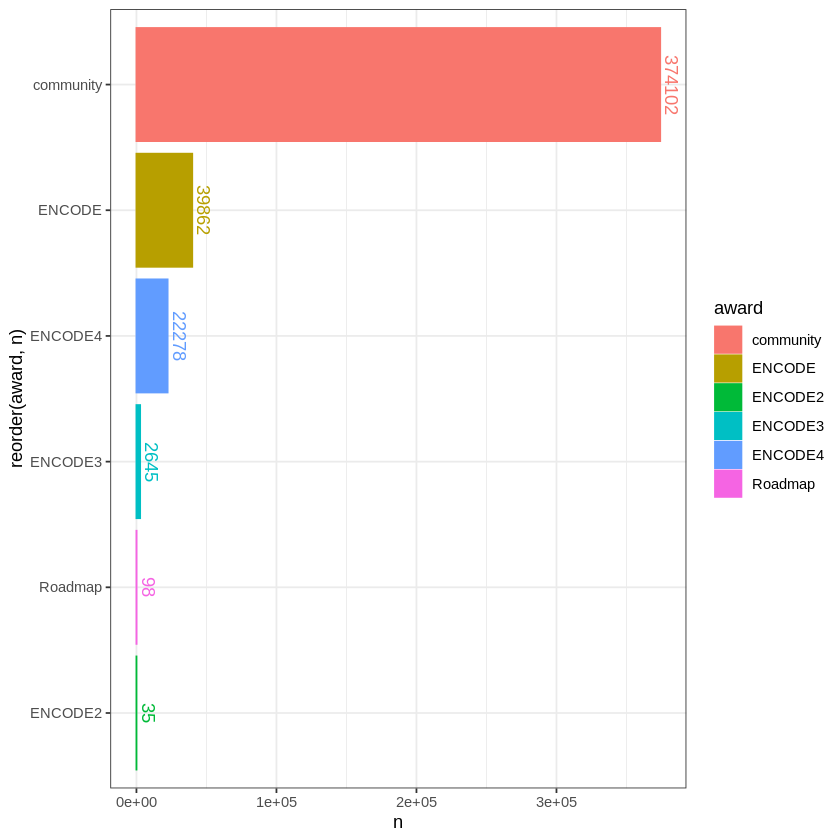

In [64]:
ggplot(my_df2, aes(x=reorder(award,n), y=n, color=award, fill=award)) +
  geom_bar(stat="identity") + 
    geom_text(aes(label = n), vjust=-0.4, angle=270) + 
    coord_flip() + theme_bw()
           

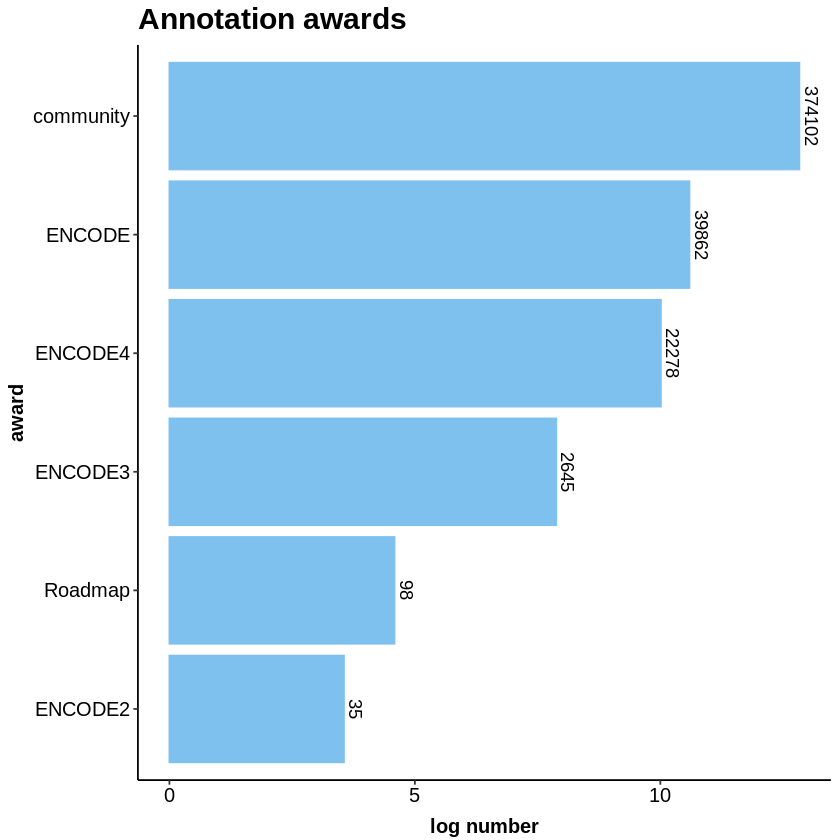

In [87]:
ggplot(my_df2, aes(x=reorder(award,n), y=log(n))) +
  geom_bar(stat="identity", color="skyblue2", fill="skyblue2") + 
    geom_text(aes(label = n), vjust=-0.4, angle=270) + 
    coord_flip() + theme_classic() +
    ggtitle("Annotation awards") +
    theme(legend.position="none", 
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 18, face = "bold")) +
           xlab("award") +
           ylab("log number")
           

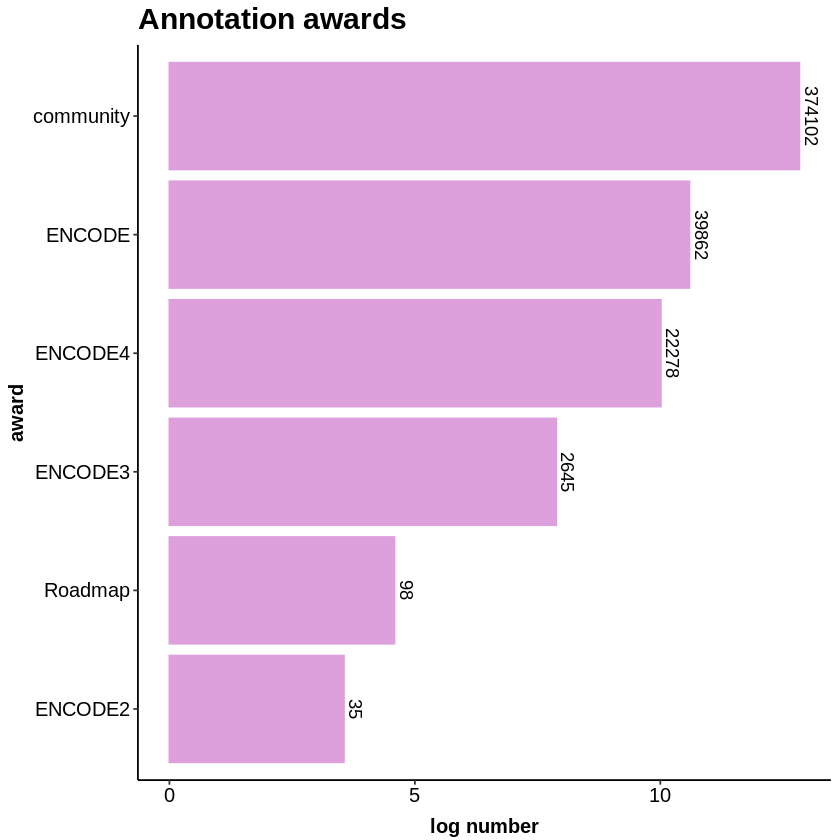

In [86]:
ggplot(my_df2, aes(x=reorder(award,n), y=log(n))) +
  geom_bar(stat="identity", color="plum", fill="plum") + 
    geom_text(aes(label = n), vjust=-0.4, angle=270) + 
    coord_flip() + theme_classic() +
    ggtitle("Annotation awards") +
    theme(legend.position="none", 
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 18, face = "bold")) +
           xlab("award") +
           ylab("log number")

In [ ]:
ggplot(my_df2, aes(x=reorder(award,n), y=log(n), color=award, fill=award)) +
  geom_bar(stat="identity") + 
    geom_text(aes(label = n), vjust=-0.4, angle=270) + 
    coord_flip() + theme_classic()

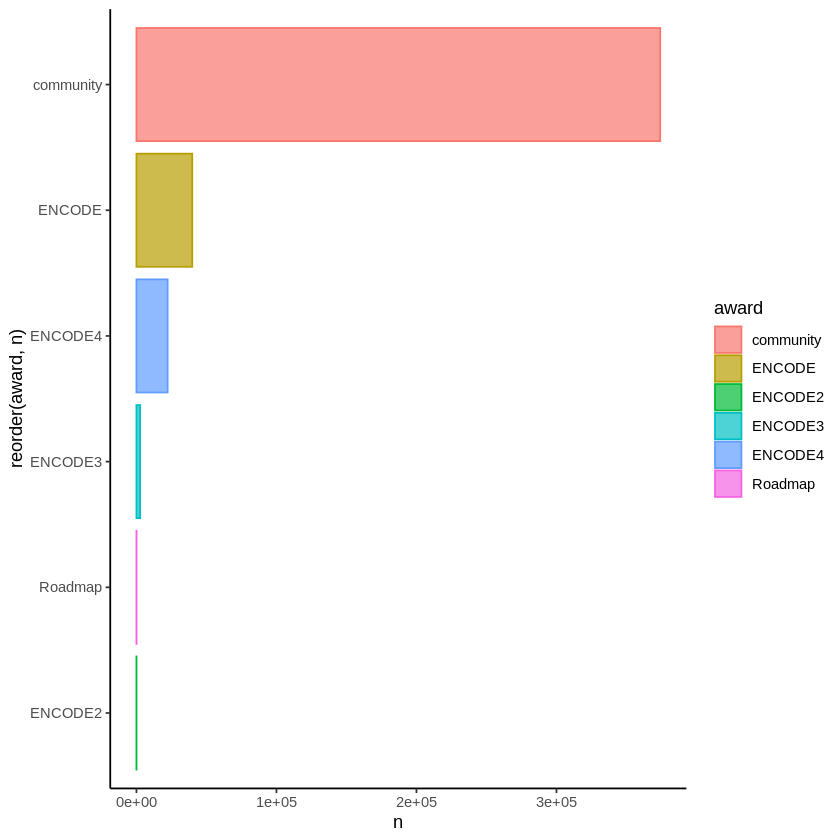

In [28]:

ggplot(my_df2) +
  geom_bar(aes(x=reorder(award, n),
                y=n,
               color=award, 
               fill=award), 
           stat="identity", alpha=0.7) + 
           coord_flip() + theme_classic()

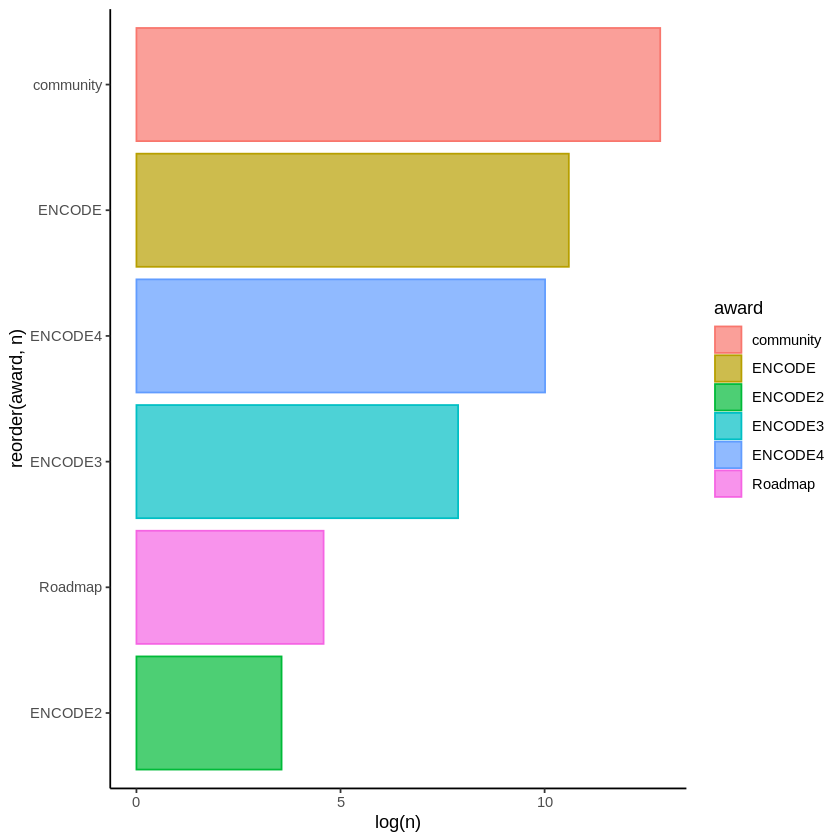

In [21]:
ggplot(my_df2) +
  geom_bar(aes(x=reorder(award, n), 
               y=log(n), 
               color=award, 
               fill=award), 
           stat="identity", alpha=0.7) + coord_flip() + theme_classic()

In [89]:
my_df3 <- my_df %>% 
            group_by(annotation_type) %>% 
            summarise(n = n())

In [23]:
my_df3

annotation_type,n
<chr>,<int>
binding sites,1
candidate Cis-Regulatory Elements,4157
chromatin state,1251
consensus DNase hypersensitivity sites,2
dsQTLs,9
eQTLs,49
exclusion list,4
fine-mapped variants,119
footprints,373297


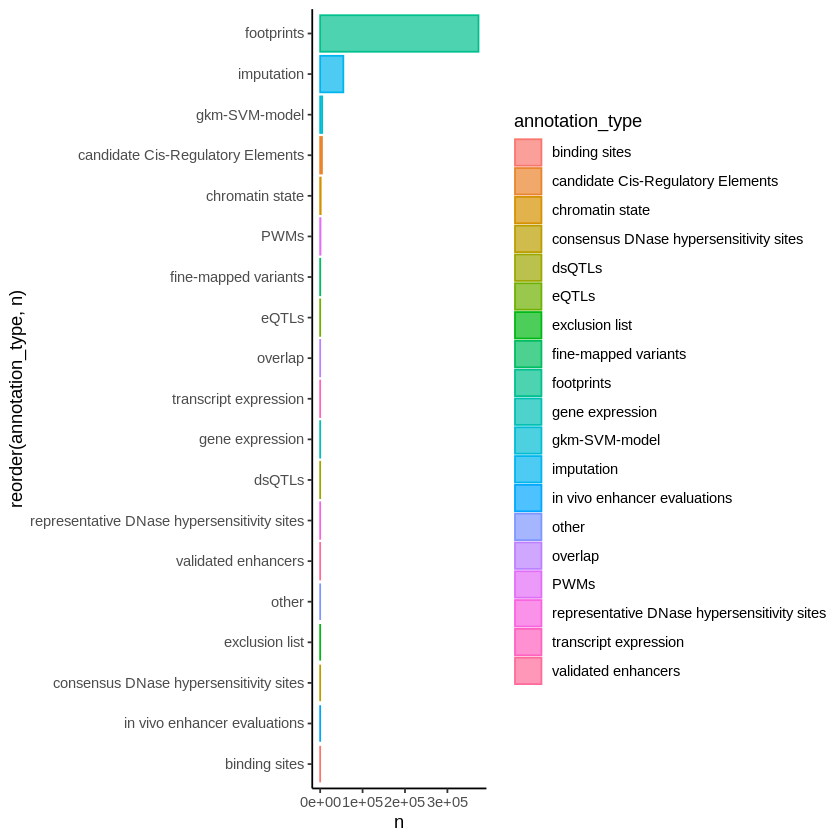

In [26]:
ggplot(my_df3) +
  geom_bar(aes(x=reorder(annotation_type, n), 
               y=n, 
               color=annotation_type, 
               fill=annotation_type), 
           stat="identity", alpha=0.7) + coord_flip() + theme_classic()

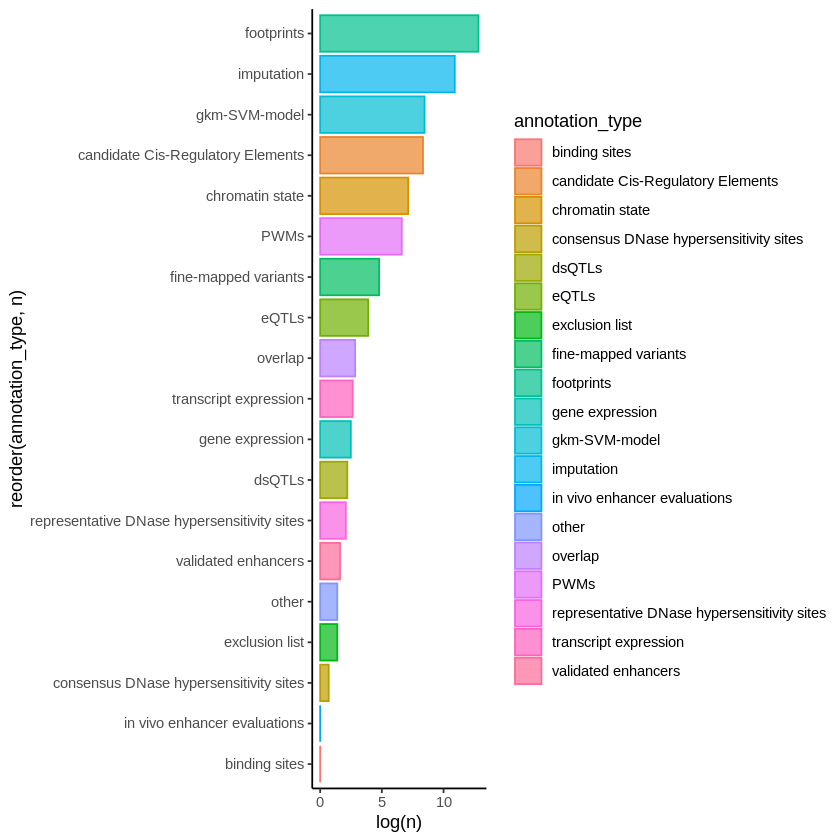

In [27]:
ggplot(my_df3) +
  geom_bar(aes(x=reorder(annotation_type, n), 
               y=log(n), 
               color=annotation_type, 
               fill=annotation_type), 
           stat="identity", alpha=0.7) + coord_flip() + theme_classic()

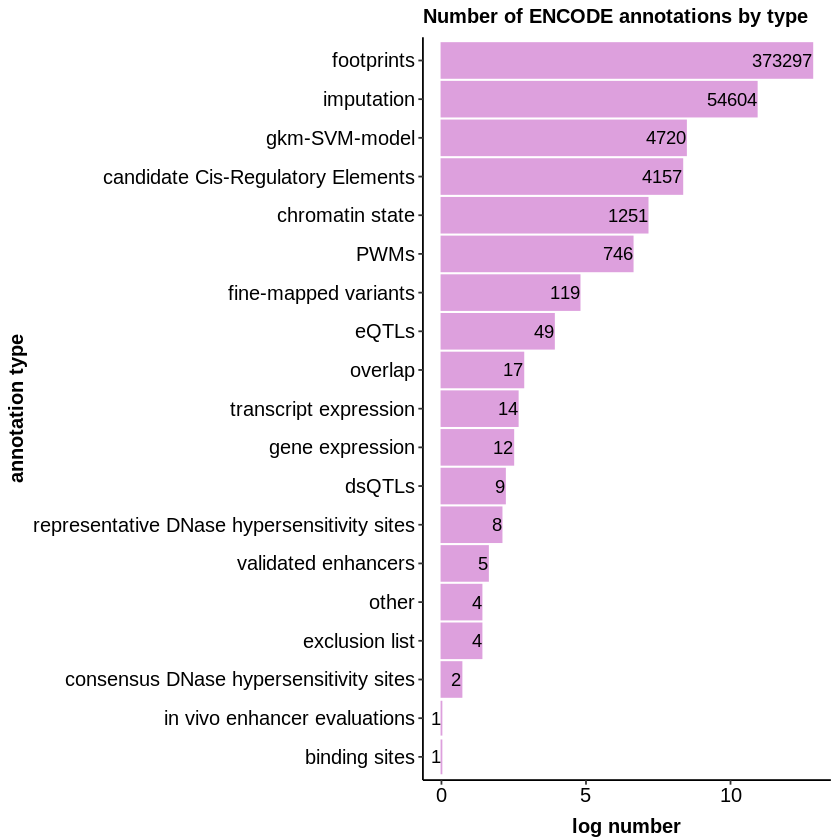

In [102]:
ggplot(my_df3, aes(x=reorder(annotation_type,n), y=log(n))) +
  geom_bar(stat="identity", color="plum", fill="plum") + 
    geom_text(aes(label = n), vjust=0.5, hjust=1, angle=360) + 
    coord_flip() + theme_classic() +
    ggtitle("Number of ENCODE annotations by type") +
    theme(legend.position="none", 
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 12, face = "bold")) +
           xlab("annotation type") +
           ylab("log number")

In [ ]:
#remove footprints
my_df3 <- 

In [30]:
my_df4 <- my_df %>% 
            group_by(Organism) %>% 
            summarise(n = n())

In [31]:
my_df4


Organism,n
<chr>,<int>
Homo sapiens,437785
Mus musculus,1115
NA,120


In [42]:
my_df4 <- my_df4[-3,]

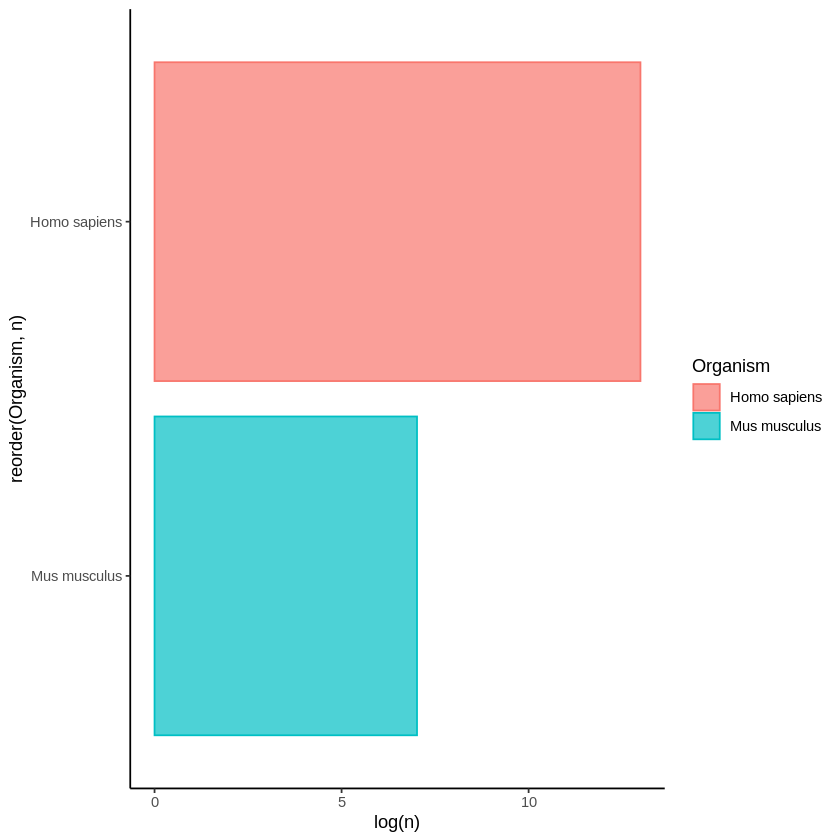

In [43]:
ggplot(my_df4) +
  geom_bar(aes(x=reorder(Organism,n),
               y=log(n), 
               color=Organism, 
               fill=Organism), 
           stat="identity", alpha=0.7) + coord_flip() + theme_classic()

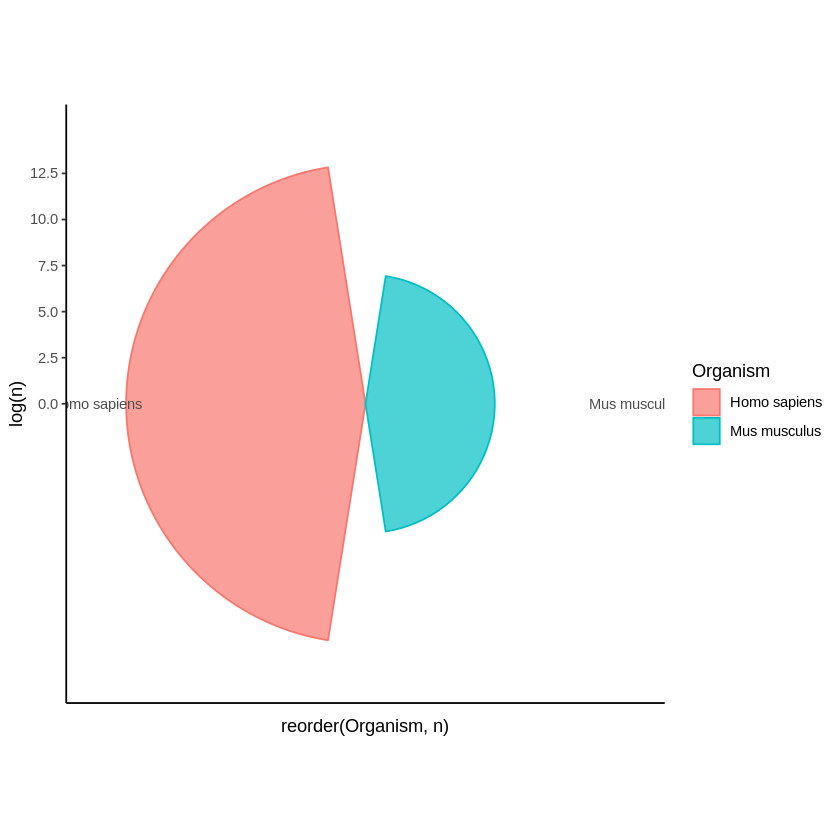

In [44]:
ggplot(my_df4) +
  geom_bar(aes(x=reorder(Organism,n),
               y=log(n), 
               color=Organism, 
               fill=Organism), 
           stat="identity", alpha=0.7) + coord_polar() + theme_classic()

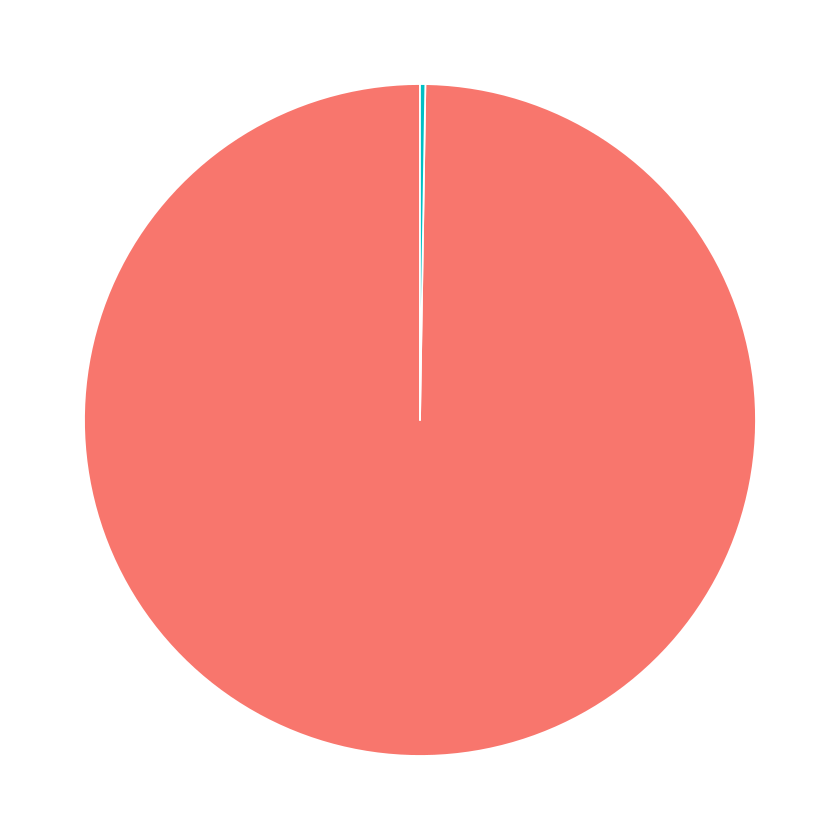

In [46]:
ggplot(my_df4, aes(x="", y=n, fill=Organism)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void() + 
  theme(legend.position="none")


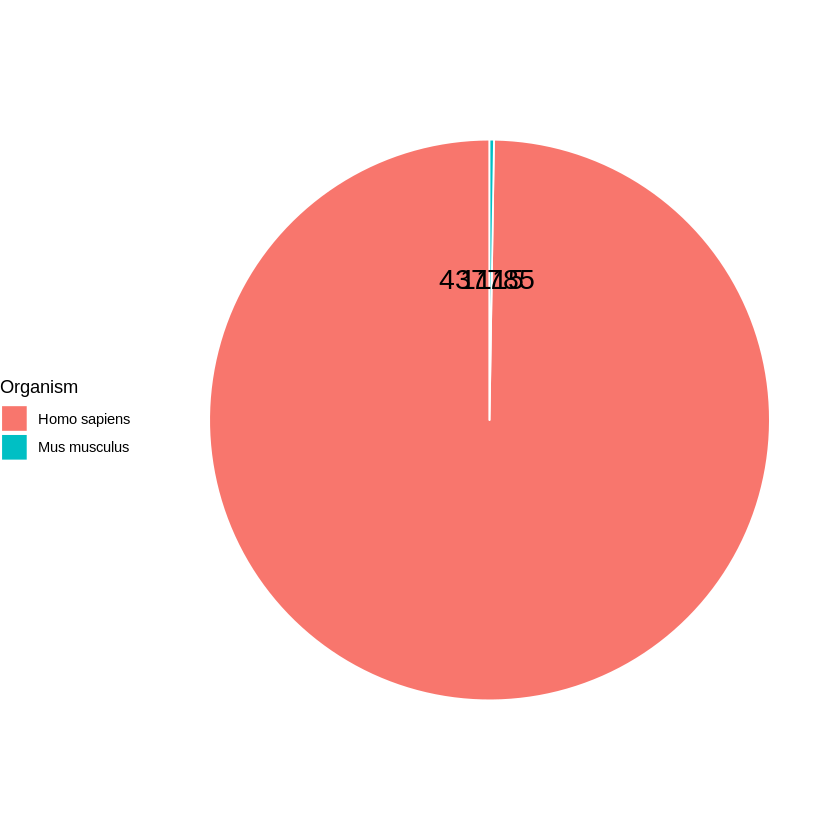

In [61]:
ggplot(my_df4, aes(x="", y=n, fill=Organism)) +
  geom_bar(stat="identity", width=1, color="white") +
  coord_polar("y", start=0) +
  theme_void() + 
  theme(legend.position="left") +
    geom_text(aes(label = n), color = "black", size=6)
  


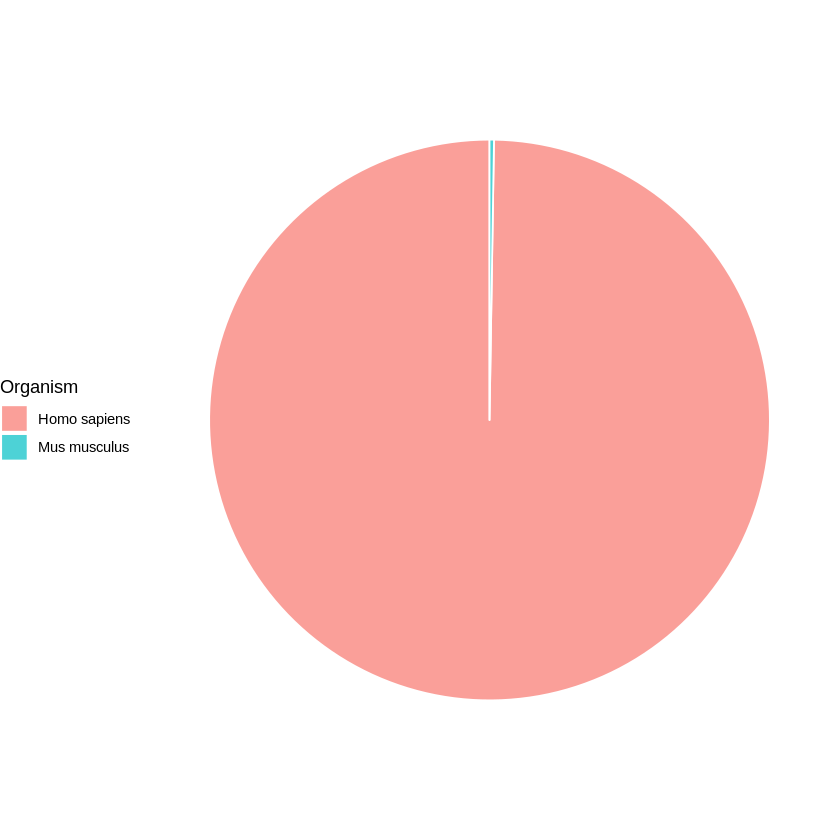

In [63]:
ggplot(my_df4, aes(x="", y=n, fill=Organism)) +
  geom_bar(stat="identity", width=1, color="white", alpha=0.7) +
  coord_polar("y", start=0) +
  theme_void() + 
  theme(legend.position="left")
  


In [65]:
install.packages("cowplot")
library("cowplot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [74]:
library(RColorBrewer)

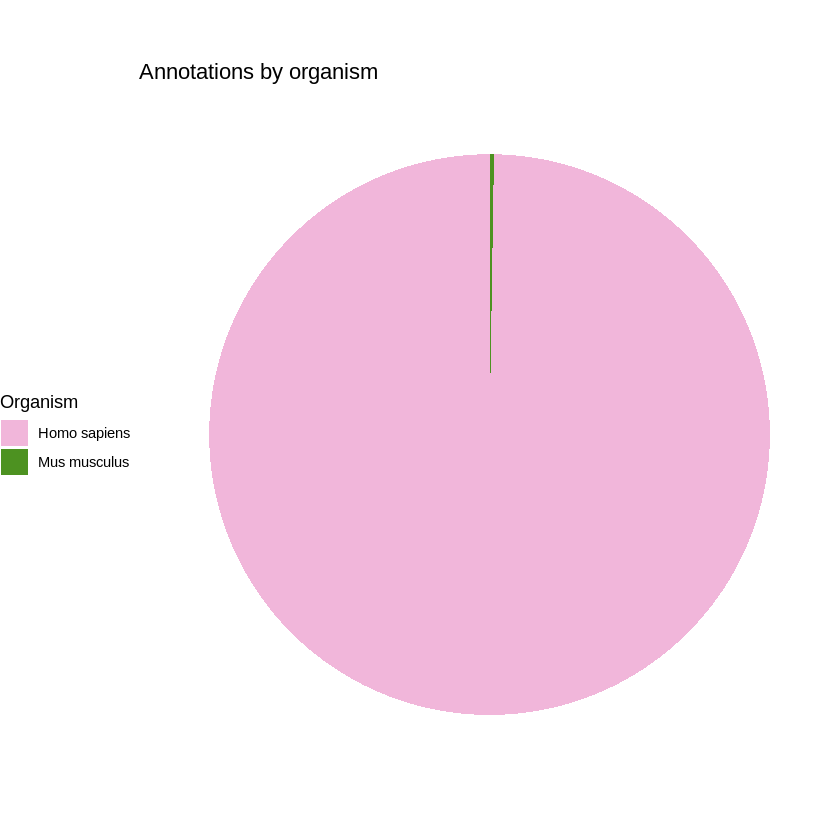

In [86]:
ggplot(my_df4, aes(x = "", y = n, fill = Organism)) +
  geom_col() + scale_fill_manual(values=c("#f1b6da", "#4d9221")) +
  coord_polar(theta = "y") + theme_void() + 
  theme(legend.position="left") +
  ggtitle("Annotations by organism")

In [ ]:
#USEFUL resource: https://github.com/sdtaylor/complex_figure_examples/blob/master/klingbeil2021/klingbeil2021.R
#https://r-charts.com/part-whole/treemapify/
#https://colorbrewer2.org/#type=diverging&scheme=PiYG&n=9
#https://r-coder.com/read-txt-r/
# https://statisticsglobe.com/scale-colour-fill-brewer-rcolorbrewer-package-r
# https://stackoverflow.com/questions/34160431/scaling-really-large-bar-compared-to-other-bars-in-ggplot2-in-r

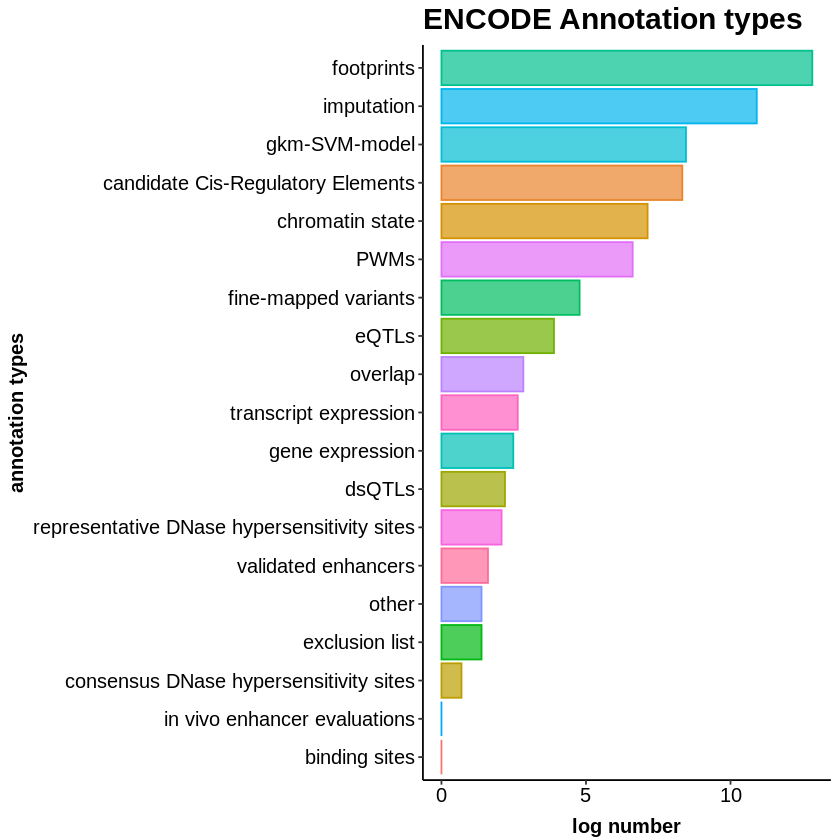

In [111]:
ggplot(my_df3) +
  geom_bar(aes(x=reorder(annotation_type, n), 
               y=log(n), 
               color=annotation_type, 
               fill=annotation_type), 
           stat="identity", alpha=0.7) + coord_flip() + theme_classic()+
           ggtitle("ENCODE Annotation types") +
           theme(legend.position="none", 
           axis.title.x=element_text(vjust = -0.5, size=12, color="black", face="bold"),
           axis.title.y=element_text(hjust = 0.5, size=12, color="black", face="bold"),
           axis.text.x =element_text(size=12, color="black"),
           axis.text.y =element_text(size=12, color="black")) + 
           theme(plot.title = element_text(size = 18, face = "bold")) +
           ylab("log number") +
           xlab("annotation types")
           #scale_fill_brewer(palette = "YlGnBu")

In [114]:
install.packages("treemapify")
library(treemapify)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shades’, ‘ggfittext’




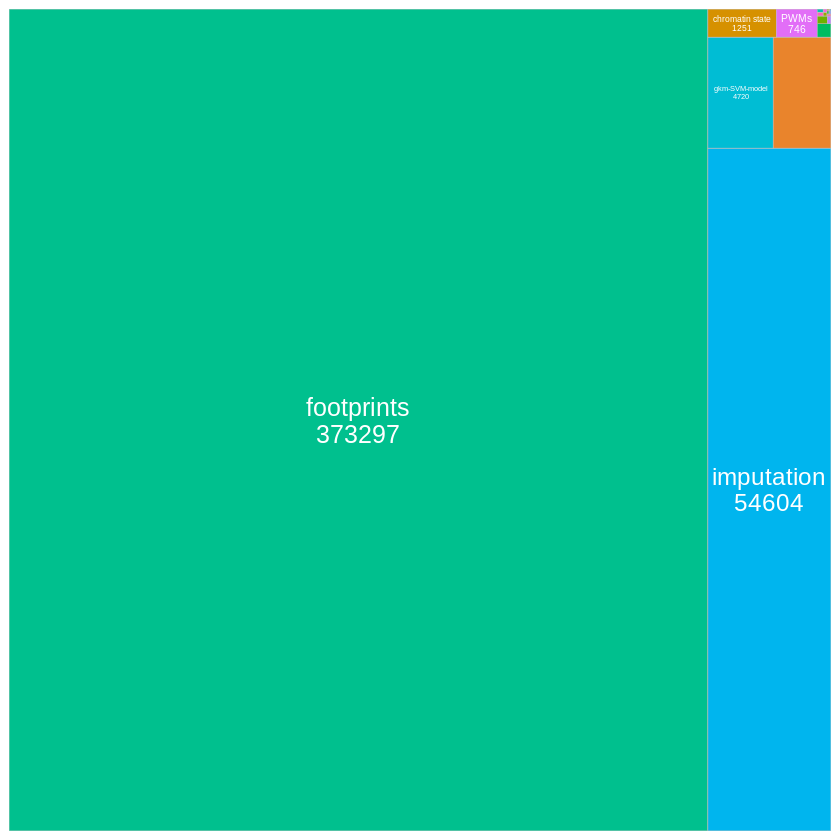

In [116]:
ggplot(my_df3, aes(area = n, fill = annotation_type,
               label = paste(annotation_type, n, sep = "\n"))) +
  geom_treemap() +
  geom_treemap_text(colour = "white",
                    place = "centre",
                    size = 15) +
  theme(legend.position = "none")

In [124]:
my_df3_minus_foot_prints_imputations <- my_df3[-c(9,12), ]

In [126]:
my_df3_minus_foot_prints_imputations

annotation_type,n
<chr>,<int>
binding sites,1
candidate Cis-Regulatory Elements,4157
chromatin state,1251
consensus DNase hypersensitivity sites,2
dsQTLs,9
eQTLs,49
exclusion list,4
fine-mapped variants,119
gene expression,12


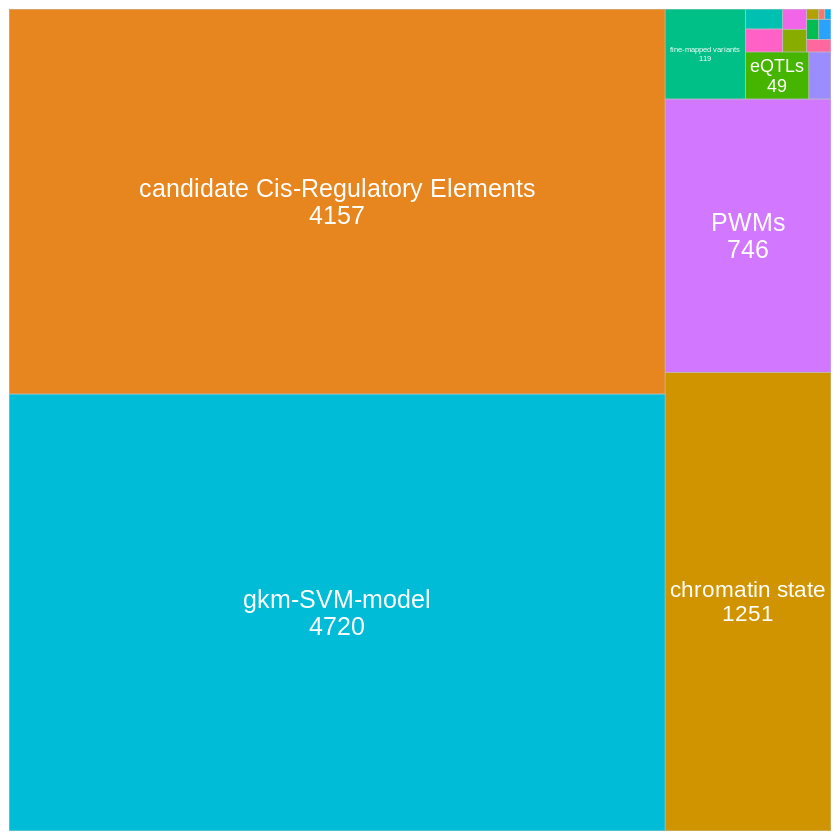

In [127]:
ggplot(my_df3_minus_foot_prints_imputations, aes(area = n, fill = annotation_type,
               label = paste(annotation_type, n, sep = "\n"))) +
  geom_treemap() +
  geom_treemap_text(colour = "white",
                    place = "centre",
                    size = 15) +
  theme(legend.position = "none")

In [106]:
my_df4 <- my_df %>% group_by(annotation_type, assembly) %>% summarise(n = n())

`summarise()` has grouped output by 'annotation_type'. You can override using
the `.groups` argument.


In [108]:
my_df4

annotation_type,assembly,n
<chr>,<list>,<int>
binding sites,GRCh38,1
candidate Cis-Regulatory Elements,hg19,1073
candidate Cis-Regulatory Elements,GRCh38,2367
candidate Cis-Regulatory Elements,mm10,717
chromatin state,hg19,188
chromatin state,,98
chromatin state,"GRCh38, hg19",833
chromatin state,mm10,132
consensus DNase hypersensitivity sites,GRCh38,1
